<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/impulse_regime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
START = "2018-01-01"  #yyyy-mm-dd
#END = '2023-08-01'


In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
ticker = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/data/main/ind_nifty50list.csv')
ticker=ticker['Symbol'].tolist()
ticker=list(set(ticker))
#ticker=['reliance','tcs','hdfcbank','icicibank','bhartiartl','sbin','infy','lici','hindunilvr','itc','lt','bajfinance','hcltech','axisbank','maruti']

In [15]:
import pandas as pd
#



def calculate_macd(data, fastperiod=12, slowperiod=26, signalperiod=9):
    # Calculate the short-term EMA
    short_ema = data['Close'].ewm(span=fastperiod, adjust=False).mean()

    # Calculate the long-term EMA
    long_ema = data['Close'].ewm(span=slowperiod, adjust=False).mean()

    # Calculate the MACD line
    macd_line = short_ema - long_ema

    # Calculate the signal line (9-day EMA of MACD line)
    signal_line = macd_line.ewm(span=signalperiod, adjust=False).mean()

    # Calculate MACD Histogram
    macd_histogram = macd_line - signal_line

    return macd_line, signal_line, macd_histogram

def calculate_impulse_signals(data):
    # Calculate 13-period EMA
    data['ema_13'] = data['Close'].ewm(span=13, adjust=False).mean()

    # Calculate MACD and MACD Histogram
    data['macd'], data['signal_line'], data['macd_histogram'] = calculate_macd(data)

    # Calculate previous values for comparison
    data['prev_ema_13'] = data['ema_13'].shift(1)
    data['prev_macd_histogram'] = data['macd_histogram'].shift(1)

    # Initialize color column with 'blue'
    data['color'] = 0

    # Green Price Bar condition
    green_condition = (data['ema_13'] > data['prev_ema_13']) & (data['macd_histogram'] > data['prev_macd_histogram'])
    data.loc[green_condition, 'color'] = 1

    # Red Price Bar condition
    red_condition = (data['ema_13'] < data['prev_ema_13']) & (data['macd_histogram'] < data['prev_macd_histogram'])
    data.loc[red_condition, 'color'] = -1

    return data

# Example usage:
# Assuming you have a DataFrame 'df' with 'Date' and 'Close' columns
# df = pd.read_csv('your_data.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Calculate impulse signals





In [4]:
#Download Data From Yahoo Finance
lst=[]
for i in range(len(ticker)):
  dfi = yf.download(str(ticker[i])+'.ns', start=START)
  dfi=calculate_impulse_signals(dfi)

  dfi = dfi.dropna()

  #df.head(3)
  #print('Done : '+ nifty10[i])
  #print(df.head(2))
  lst.append(dfi)

#df1.head(3)
print('\n All Completed \n')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********


 All Completed 



In [5]:
nlst=[]
for i in range(len(ticker)):
  nlst.append(lst[i].color)

In [6]:
df = pd.DataFrame(nlst).T

In [7]:
df['signal']=df.sum(axis=1)

In [8]:
df['signal']=df['signal'].tail(600)

In [9]:
data = yf.download('^nsei',start=START)
nifty=data[-600:].copy()

[*********************100%***********************]  1 of 1 completed


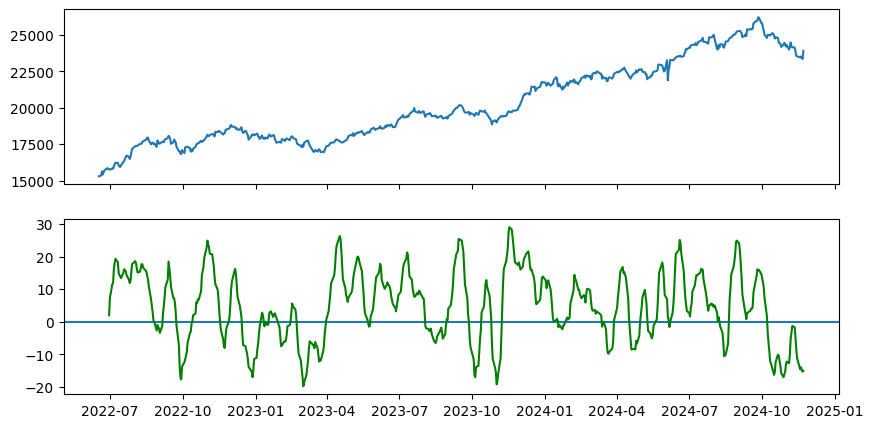

In [10]:
fig, ax = plt.subplots(2,1, figsize=(10,5),sharex=True)
ax[0].plot(nifty['Adj Close'])
ax[1].axhline(y=0)
ax[1].plot(df.signal.rolling(window=10).mean(),color='g');
#plt.gca().invert_yaxis()
plt.show()